In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data=pd.read_csv("AAPL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


*Data Describtion :-

**Date : Date of trading

**Open : Price at which security first trades

**High : Highest Price of the trading day

**Low : Lowest Price of the trading day

**Close : Last Price the stock traded during the trading day

**Adj Close : Price that is adjusts Coroporate Actions on Closing Price

**Volume : Number of Shares that changed hands during the trading day

# Data Preprocessing

#### Transform Date to datetime object and Set as Index :

In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
data.Date = pd.to_datetime(data.Date)
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [8]:
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [9]:
df.set_index('Date',inplace=True)

In [10]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2011, freq=None)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


### Check for Holidays :

In [12]:
from datetime import date

In [13]:
data.head(1).index, data.tail(1).index

(RangeIndex(start=0, stop=1, step=1),
 RangeIndex(start=2010, stop=2011, step=1))

## Create CustomBusinessDay :


In [14]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [15]:
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [16]:
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=us_cal)
print(my_range.difference(data.index))

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', length=2006, freq='C')


In [17]:
Cu = CustomBusinessDay(calendar=USFederalHolidayCalendar(),holidays=['2012-04-06', '2012-10-29', '2012-10-30', 
                                                                    '2013-03-29','2014-04-18', '2015-04-03', 
                                                                    '2016-03-25', '2017-04-14', '2018-03-30', 
                                                                    '2018-12-05', '2019-04-19'])
my_range = pd.date_range(start='2012-01-03',end='2019-12-30',freq=Cu)
print(my_range.difference(data.index))

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', length=1995, freq='C')


## C is the custom frequency here that includes the holidays other than weekends.



In [18]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [19]:
df = df.asfreq(Cu)

In [20]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1995, freq='C')

### Now the datetime index has the frequncy C.

# Time Series Analysis :


In [21]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


### Considering only the closing price for the analysis :



In [22]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)
df.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


### Downsampling the data to Monthly :


In [23]:
df_m = df.resample('M').mean()
df_m.head(),df_m.tail()

(                Close
 Date                 
 2012-01-31  61.225428
 2012-02-29  71.081572
 2012-03-31  82.501104
 2012-04-30  86.571857
 2012-05-31  80.667597,                  Close
 Date                  
 2019-08-31  204.957728
 2019-09-30  217.994999
 2019-10-31  235.260000
 2019-11-30  262.537371
 2019-12-31  275.669496)

### Line plot :


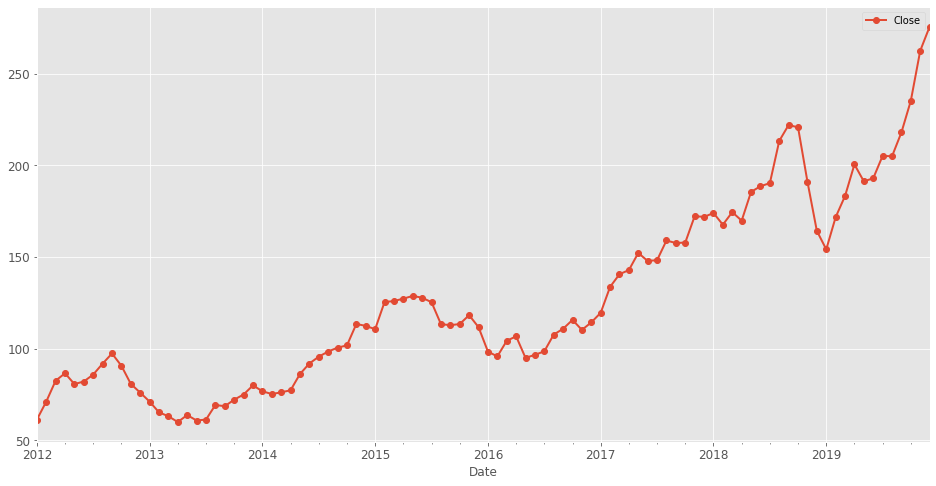

In [24]:
df_m.plot(figsize=(16,8), linewidth=2,marker='o', fontsize=12);

### Seasonal Decomposition plot :


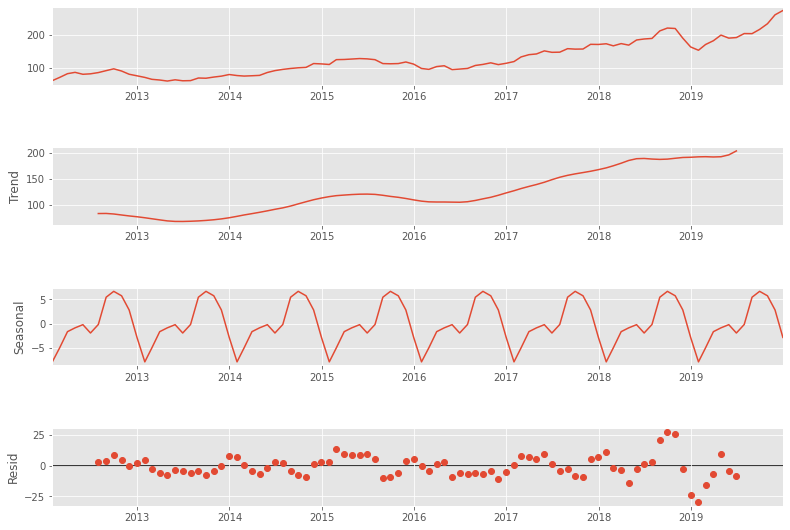

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

seas_add = seasonal_decompose(df_m, model='additive')
seas_add.plot()
plt.gcf().set_size_inches(12, 8);

#### Repeating patterns are seen. It shows yearly seasonality.



### Augmented Dickey-Fuller Test :


#### Null Hypothesis - Time series has unit root, hence not stationary

#### Alternate Hypothesis - Time series has no unit root, hence stationary

#### If p-value is less than 0.05, reject Null Hypothesis

#### If p-value is greater than 0.05, fail to reject Null Hypothesis

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
def test_stationarity(series):
    
    stat_test = adfuller(series,autolag='AIC')

    print('Test Statistic : ',stat_test[0])
    print('p value : ',stat_test[1])
    print('Number of Lags : ',stat_test[2])
    print('Critical values : ')
    for key, val in stat_test[4].items():
        print('\t',key, ': ',val)
    print()    
    if stat_test[1] > 0.05:
        print('Series is non-stationary')
    else:
        print('Series is stationary')

In [28]:
 test_stationarity(df)

Test Statistic :  1.0317948672536863
p value :  0.9945903468087544
Number of Lags :  17
Critical values : 
	 1% :  -3.433661993406868
	 5% :  -2.8630030510232647
	 10% :  -2.567548867394869

Series is non-stationary


#### Check the order of non-seasonal differencing needed :


In [29]:
import pmdarima as pm

In [30]:
diff = pm.arima.ndiffs(df_m['Close'],max_d=4)
print(f'Order of non-seasonal Differencing = {diff}')

Order of non-seasonal Differencing = 1


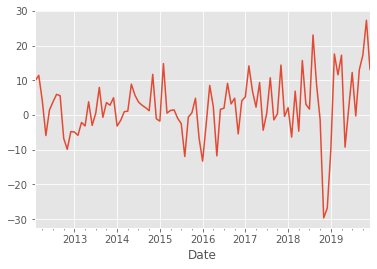

In [31]:
dfm_lag = df_m['Close'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
dfm_lag.plot();

In [32]:
diff1 = pm.arima.ndiffs(dfm_lag,max_d=4)
print(f'Order of non-seasonal Differencing = {diff1}')

Order of non-seasonal Differencing = 0


In [33]:
test_stationarity(dfm_lag)

Test Statistic :  -6.549178388231945
p value :  8.940119318440014e-09
Number of Lags :  0
Critical values : 
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781

Series is stationary


#### The series is trend stationary now.



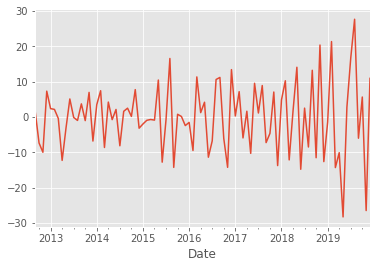

In [34]:
dfm_lag_se = dfm_lag.rolling(window=8).apply(lambda x: x.iloc[1] - x.iloc[0]).dropna()
dfm_lag_se.plot();

In [35]:
test_stationarity(dfm_lag_se)

Test Statistic :  -5.983007792223126
p value :  1.8196351010035665e-07
Number of Lags :  7
Critical values : 
	 1% :  -3.5148692050781247
	 5% :  -2.8984085156250003
	 10% :  -2.58643890625

Series is stationary


#### The p value is very low and the test statistic is less than 1% critical value. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

#### Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

# Exploratory Data Analysis :


In [36]:
d = df_m.copy()

# Separating month and date into separate column

d["month"] = d.index.strftime("%B") # month extraction
d["year"] = d.index.strftime("%Y") # year extraction
d['Q'] = d.index.quarter    # quarter extraction

# categorizing the quarters
d.loc[d['Q']==1,'quarter']='Q1'
d.loc[d['Q']==2,'quarter']='Q2'
d.loc[d['Q']==3,'quarter']='Q3'
d.loc[d['Q']==4,'quarter']='Q4'

d.head(12)

,Close,month,year,Q,quarter
Date,,,,,
2012-01-31,61.225428,January,2012,1,Q1
2012-02-29,71.081572,February,2012,1,Q1
2012-03-31,82.501104,March,2012,1,Q1
2012-04-30,86.571857,April,2012,2,Q2
2012-05-31,80.667597,May,2012,2,Q2
2012-06-30,82.080340,June,2012,2,Q2
2012-07-31,85.866871,July,2012,3,Q3
2012-08-31,91.813727,August,2012,3,Q3
2012-09-30,97.366918,September,2012,3,Q3


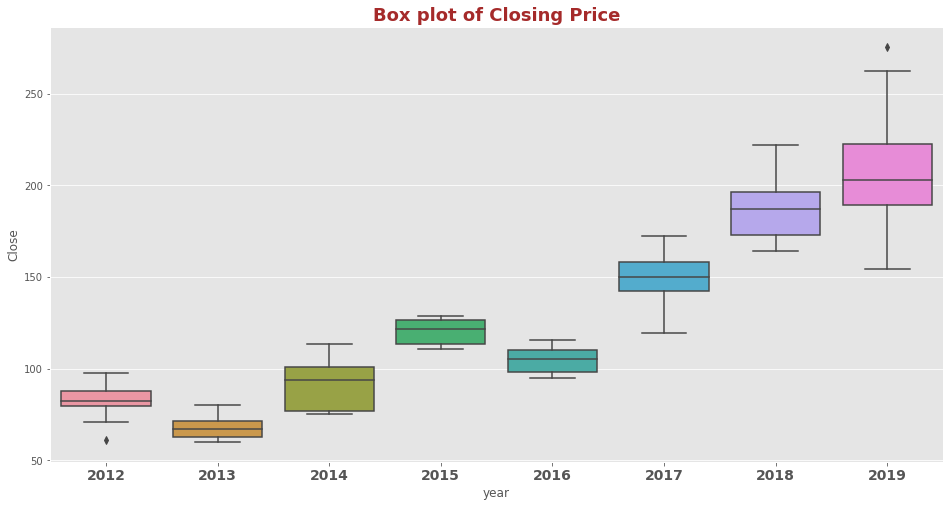

In [37]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14,fontweight='bold')
sns.boxplot(x="year",y="Close",data=d)
plt.title('Box plot of Closing Price',fontweight='bold',fontsize=18,color='brown');

##### As seen in the plot the mean is not constant over the years, which proves the time series is not stationary. There is an outlier below lower whisker in the year 2012 which indicates the price was lower than minimum at some instance and there is an outlier on the higher side in the year 2019 which indicates the value of stock had gone up more than the maximum at an instance.

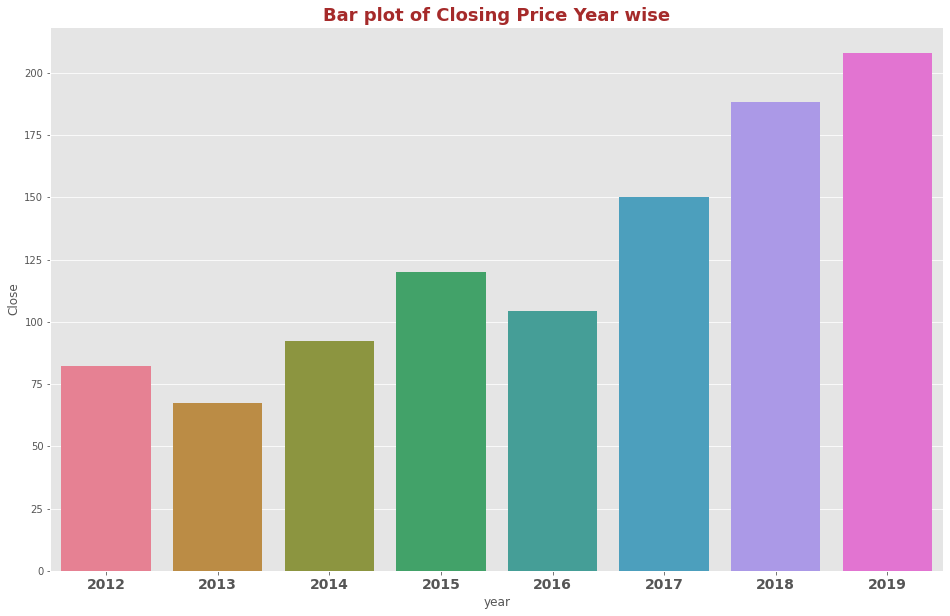

In [38]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Year wise',fontweight='bold',fontsize=18,color='brown');


#### The bars represent the frequencies of distinct values of stock price. In the above plot, we can see after a few ups and downs from 2012 to 2016 the apple stock price has increased largely since 2017 and overall there is a upward trend.

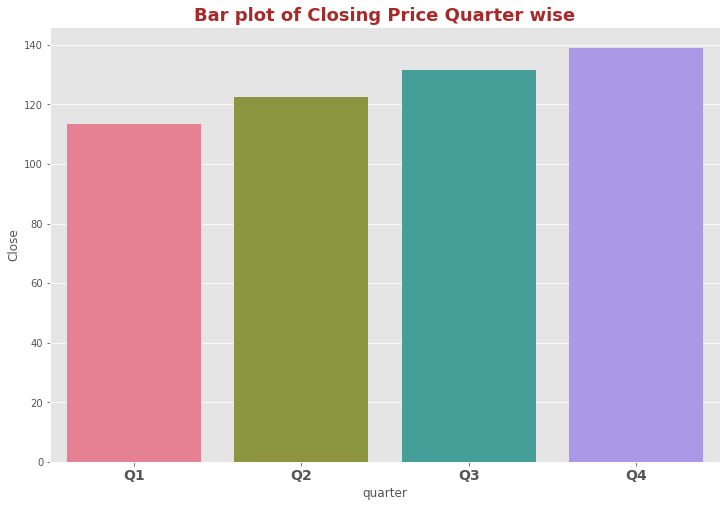

In [39]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=d,x='quarter',y='Close',palette='husl',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Quarter wise',fontweight='bold',fontsize=18,color='brown');


#### The quarter plot shows a clear upward trend .



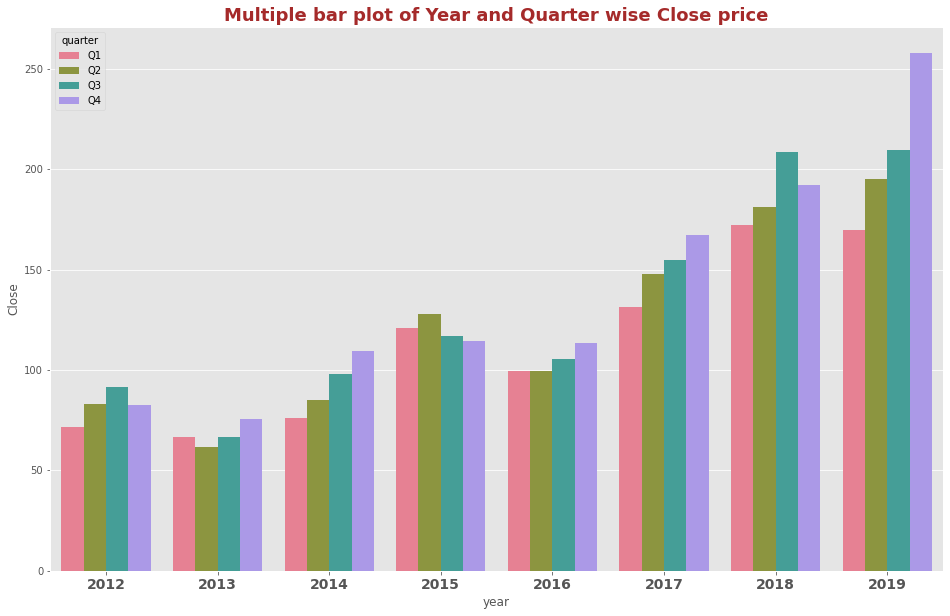

In [40]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='year',y='Close',palette='husl',hue='quarter',ci=None)
plt.xticks(fontsize=14,fontweight='bold')
plt.title('Multiple bar plot of Year and Quarter wise Close price',fontweight='bold',fontsize=18,color='brown');


#### There is a steep increase in the adj closing price of stocks in the last quarter of year 2019 whcih will possibly have greater impact in the prices of the coming year.



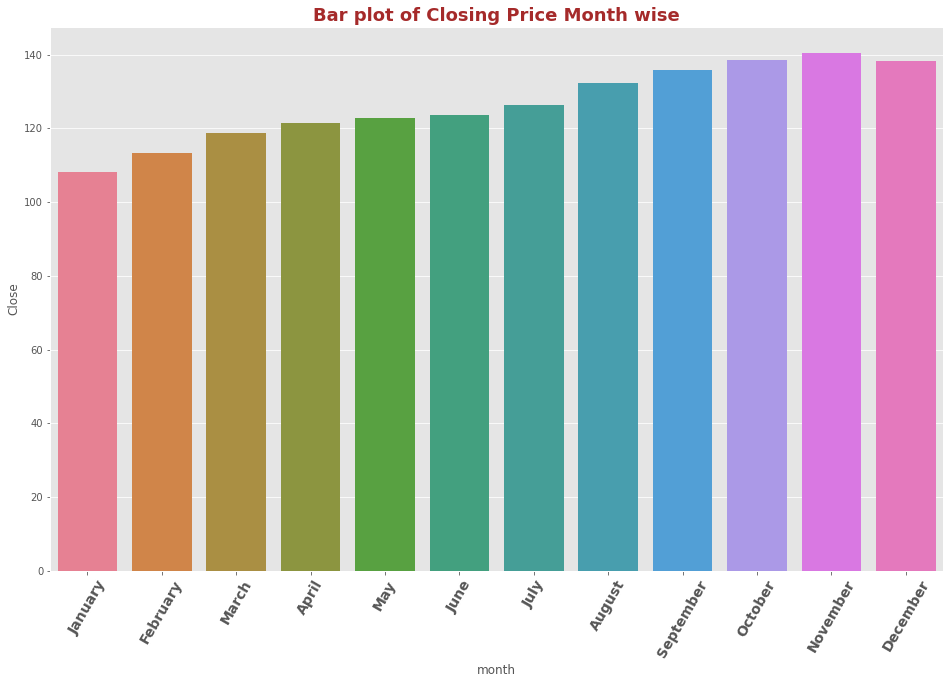

In [41]:
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d,x='month',y='Close',palette='husl',ci=None)
plt.xticks(rotation=60,fontsize=14,fontweight='bold')
plt.title('Bar plot of Closing Price Month wise',fontweight='bold',fontsize=18,color='brown');


#### The adj close price is higher in the month of November followed by December and October. This must be due to soaring of stock price in the last quarter of the year 2019 which we saw above.

### Pivot table for year and quarter :

In [42]:
d_pivot = d.pivot_table(values='Close', index='year', columns='quarter')
d_pivot

quarter,Q1,Q2,Q3,Q4
year,,,,
2012,71.602701,83.106598,91.682505,82.477047
2013,66.498682,61.512177,66.389781,75.700359
2014,76.059047,85.117529,98.203716,109.227088
2015,120.681505,127.953248,117.175945,114.480385
2016,99.480906,99.445361,105.692953,113.422071
2017,131.300678,147.648643,154.976435,167.365310
2018,172.046792,181.330844,208.577068,192.022681
2019,169.729298,194.919609,209.389697,257.822289


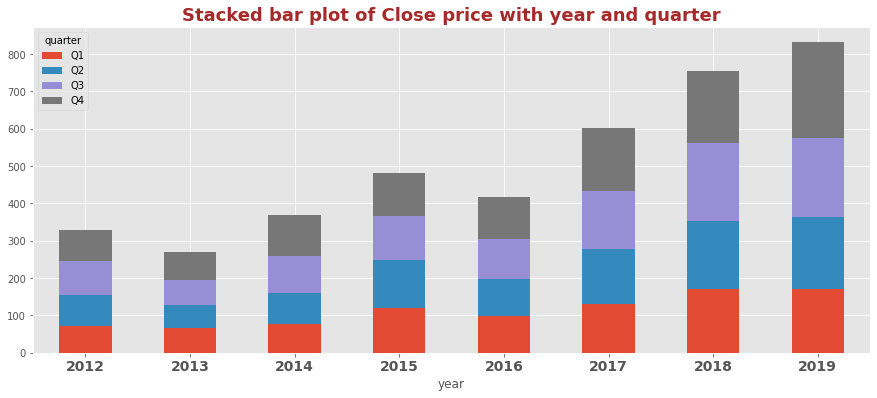

In [43]:
d_pivot.plot(kind='bar',stacked=True,figsize=(15,6))
plt.title('Stacked bar plot of Close price with year and quarter',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

#### The plot shows the yearly raising trend of stock price along with the quarters. The year 2013 has the lowest stock price in all quarters.



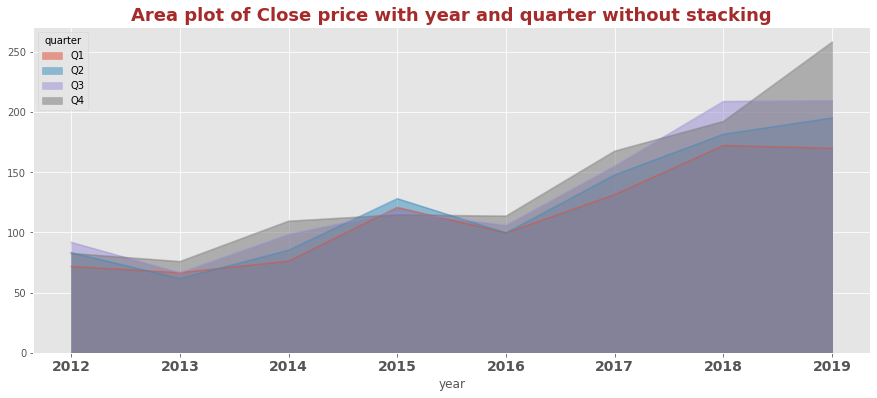

In [44]:
d_pivot.plot(kind='area',stacked=False,figsize=(15,6))
plt.title('Area plot of Close price with year and quarter without stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

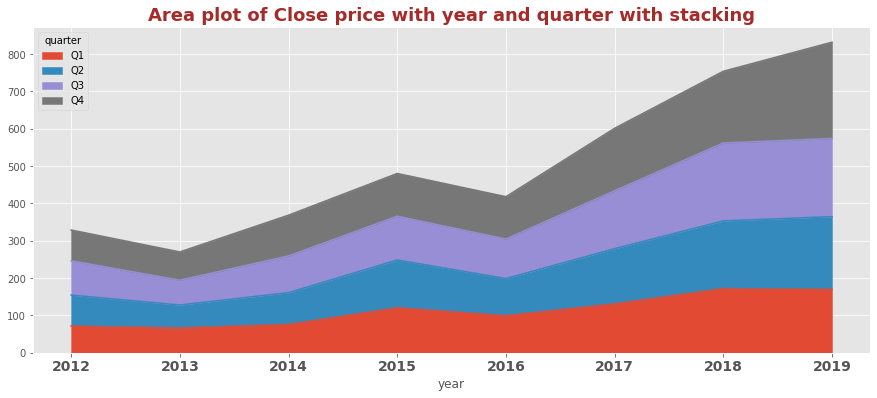

In [45]:
d_pivot.plot(kind='area',stacked=True,figsize=(15,6))
plt.title('Area plot of Close price with year and quarter with stacking',fontweight='bold',fontsize=18,color='brown')
plt.xticks(rotation=0,fontsize=14,fontweight='bold');

#### Both the plots show how the last quarter of 2019 has larger area indicating soaring stock price.



### Pivot table for year and month :


In [46]:
d_pivot2 = d.pivot_table(values='Close', index='year', columns='month')
d_pivot2

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2012,86.571857,91.813727,76.007857,71.081572,61.225428,85.866871,82.080340,82.501104,80.667597,80.774500,90.648785,97.366918
2013,59.966428,69.263376,79.951088,65.258422,71.117483,61.308182,60.791143,63.120143,63.778961,74.987067,72.162922,68.597786
2014,77.296327,98.436667,112.411364,75.225714,76.777959,95.625909,91.885443,76.173468,86.170817,113.484444,101.785455,100.548572
2015,127.291428,113.394762,111.726818,125.432105,110.641501,125.335455,127.806817,125.970908,128.761500,118.270526,113.443810,112.797619
2016,106.739048,107.665218,114.335714,95.746500,98.428946,98.556500,96.622273,104.267273,94.974762,110.240500,115.690000,110.857142
2017,142.886842,159.021306,171.891500,133.714209,119.570000,148.299499,147.831362,140.617826,152.227726,172.293001,157.911429,157.608500
2018,169.834287,213.346089,164.266317,167.638947,174.005237,190.311429,188.621429,174.496192,185.536818,191.089000,220.712727,222.073685
2019,200.516191,204.957728,275.669496,171.727893,154.166190,205.216364,192.969000,183.293810,191.273637,262.537371,235.260000,217.994999


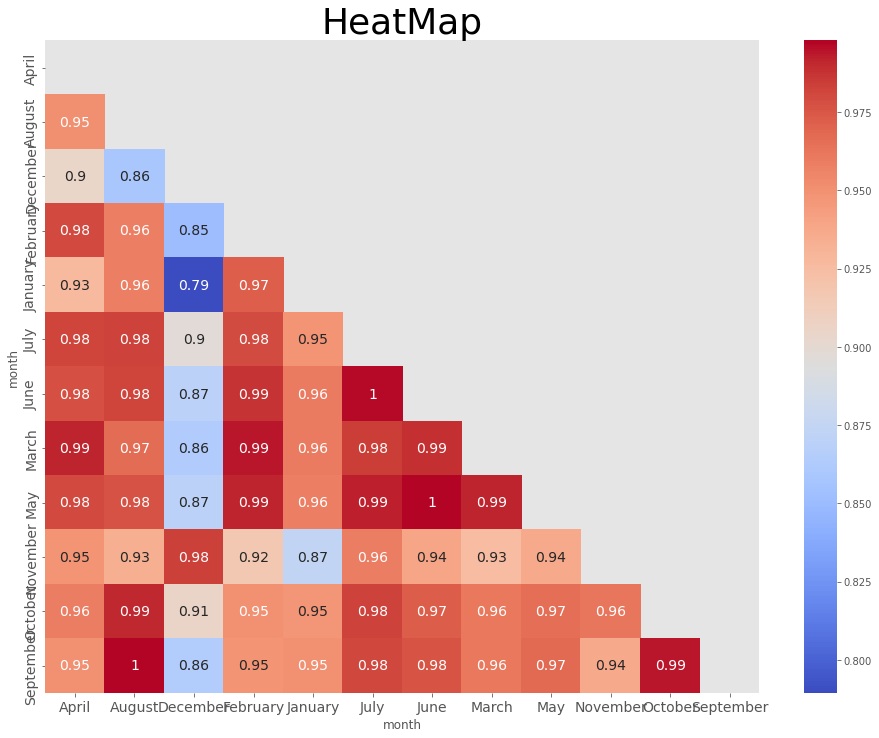

In [47]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(d_pivot2.corr())
ax = sns.heatmap(d_pivot2.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

# ACF and PACF plots :


In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

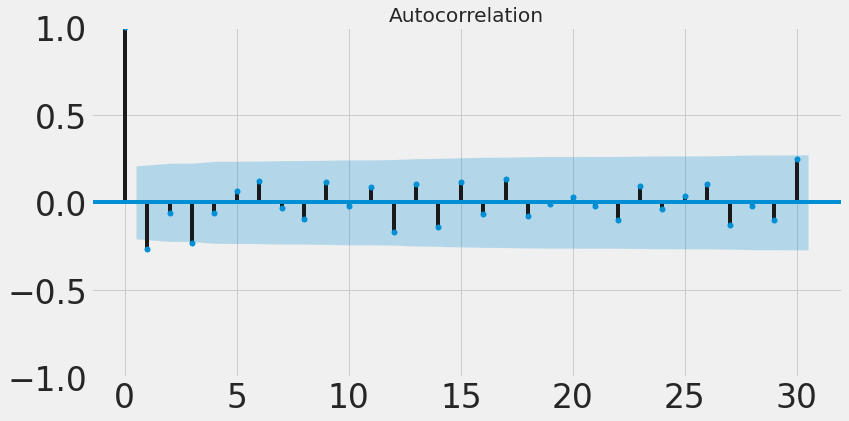

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
acf = plot_acf(dfm_lag_se,lags=30,ax=ax)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


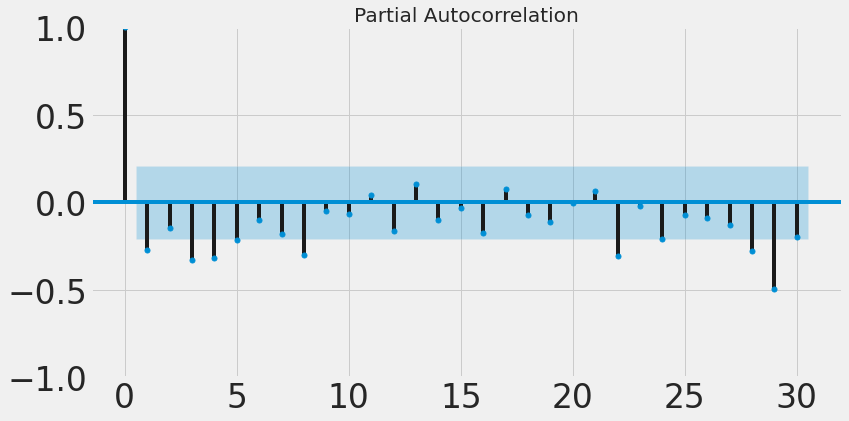

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
pacf = plot_pacf(dfm_lag_se,lags=30,ax=ax)

#### In both ACF and PACF plots, it's not clear whether they are tailing off or cutting off and since the time series needed first order differencing to make it stationary and seasonality id present it is SARIMA model that has to used for forcasting. Here since in acf and pacf plot only one point in each is above the confidence band, p = 1, q = 1, d = 1 for ARIMA and P=1, Q=1, D=1 for SARIMA with seasonality s=252 as the series has holidays.

## Split into train and test data :

In [51]:
train = df.iloc[:len(df)-249]

# Taking last one year for testing
test = df.iloc[len(df)-249:]
test.head(),test.tail()

(                 Close
 Date                  
 2019-01-02  157.919998
 2019-01-03  142.190002
 2019-01-04  148.259995
 2019-01-07  147.929993
 2019-01-08  150.750000,                  Close
 Date                  
 2019-12-23  284.000000
 2019-12-24  284.269989
 2019-12-26  289.910004
 2019-12-27  289.799988
 2019-12-30  291.519989)

## ARIMA model :

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
model_1 = ARIMA(train,order=(1,1,1))
model_1 = model_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1746
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3621.613
Date:                Thu, 02 Feb 2023   AIC                           7249.226
Time:                        15:57:12   BIC                           7265.619
Sample:                    01-03-2012   HQIC                          7255.287
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7990      0.094     -8.474      0.000      -0.984      -0.614
ma.L1          0.8391      0.087      9.652      0.000       0.669       1.009
sigma2         3.7171      0.063     58.780      0.000       3.593       3.841
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3267.45
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
start = len(train)
end = len(train)+len(test)-1
pred1 = model_1.predict(start=start,end=end,type='levels')

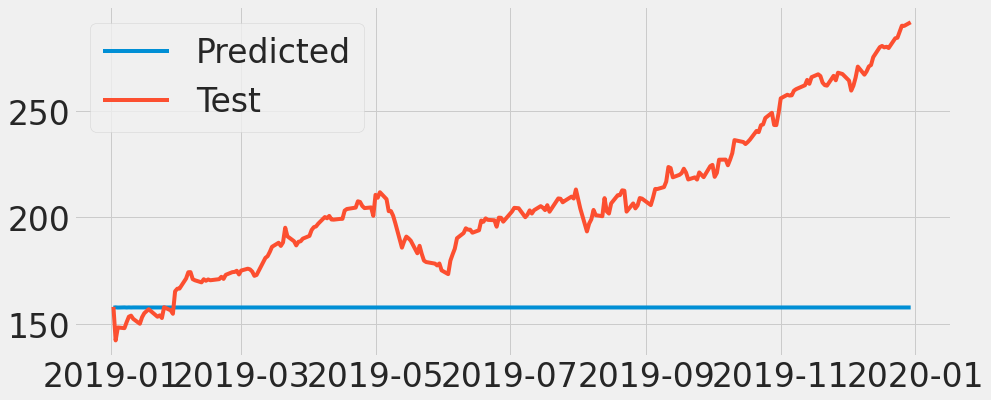

In [75]:
plt.figure(figsize=(14,6))
plt.plot(pred1, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

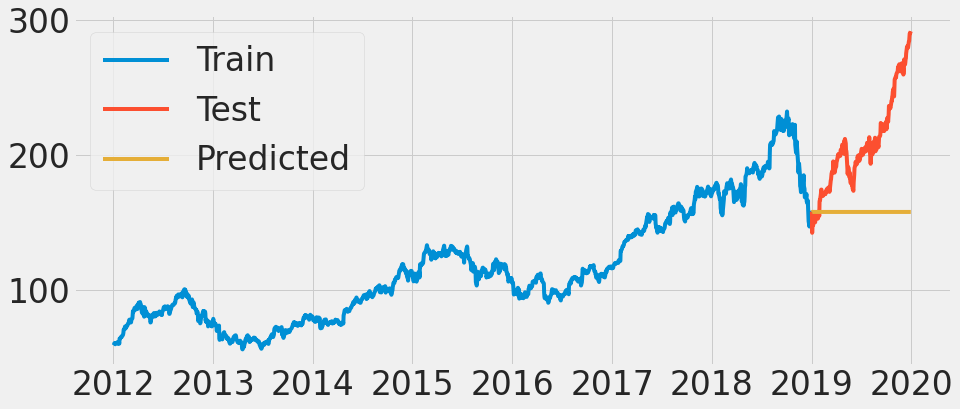

In [74]:
plt.figure(figsize=(14,6))

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred1, label='Predicted')
plt.legend(loc='best')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred1,test))

print('Root Mean Squared Error of ARIMA model =',rmse)

Root Mean Squared Error of ARIMA model = 60.429268033908365


In [58]:
test.mean()

Close    207.585462
dtype: float64

#### ARIMA with Seasonal order using Maximum likelihood estimation :

##### - As the seasonality is large.

In [59]:
import statsmodels.api as sm

In [60]:
model_se = sm.tsa.arima.ARIMA(train,order=(1,1,1),seasonal_order=(1,1,1,251))
result = model_se.fit(method='innovations_mle',low_memory=True,cov_type='none')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima/model.py:403: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


In [61]:
pred2 = result.predict(start=start,end=end,type='levels')

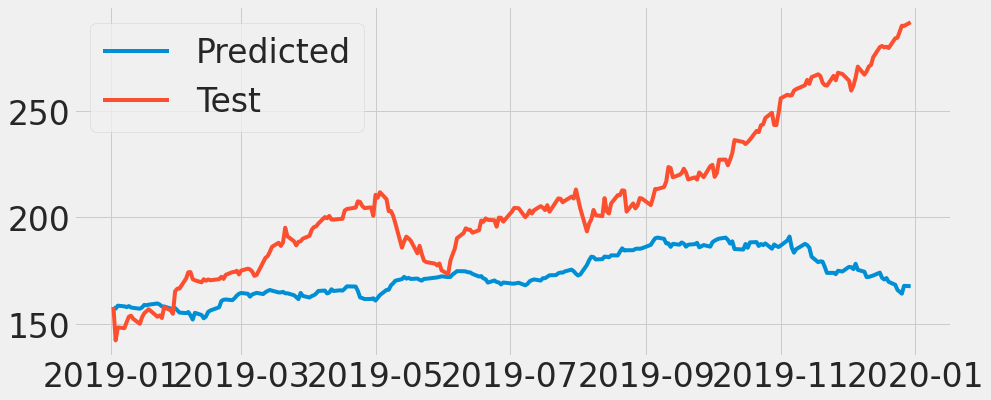

In [62]:

plt.figure(figsize=(14,6))
plt.plot(pred2, label='Predicted')
plt.plot(test, label='Test')
plt.legend(loc='best')
plt.show()

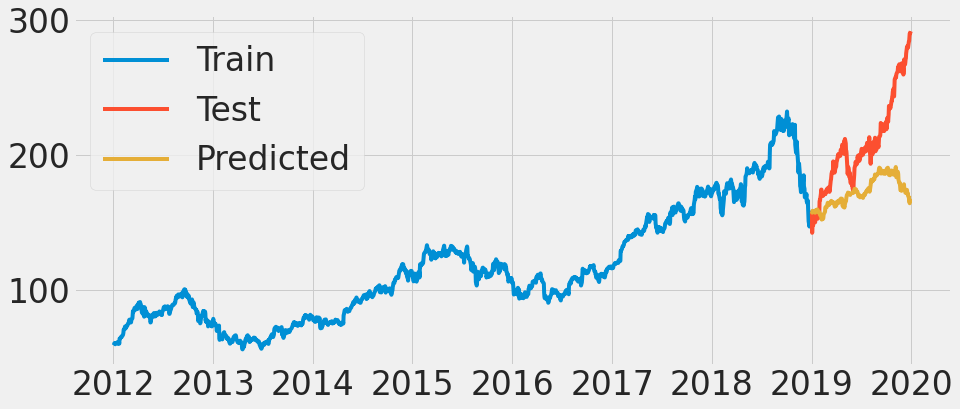

In [63]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred2, label='Predicted')
plt.legend(loc='best')
plt.show()

In [64]:
rmse2 = sqrt(mean_squared_error(pred2,test))

print('Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method =',rmse2)

Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method = 45.750427333970656


#### This model has captured seasonality and the rmse is low compared to arima model.



# SARIMA Model

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Taking half year Seasonality
model_sr = SARIMAX(train,order = (1,1,1),seasonal_order=(1,1,1,126))
model_sr = model_sr.fit()


In [ ]:
pred3 = model_sr.predict(start = start,end=end,type='levles')
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Predicted')
plt.plot(test, label ='Test')
plt.legend(loc = 'best')
plt.show()

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Train')
plt.plot(test, label ='Test')
plt.legend(loc = 'Predicted')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse3=sqrt(mean_squared_error(pred3,test))
print("Root Mean Squared Error of SARIMA Model=",rmse3)

# Holt-Winters Triple Exponential Smoothing

In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [66]:
model_h = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=252)
model_h = model_h.fit()
model_h.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Close,No. Observations:,1746
Model:,ExponentialSmoothing,SSE,5518.210
Optimized:,True,AIC,2521.168
Trend:,Multiplicative,BIC,3920.229
Seasonal:,Multiplicative,AICC,2611.043
Seasonal Periods:,252,Date:,"Thu, 02 Feb 2023"
Box-Cox:,False,Time:,16:04:40
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950038,alpha,True
smoothing_trend,0.0001001,beta,True


In [67]:
pred3=model_h.predict(start=start,end=end)

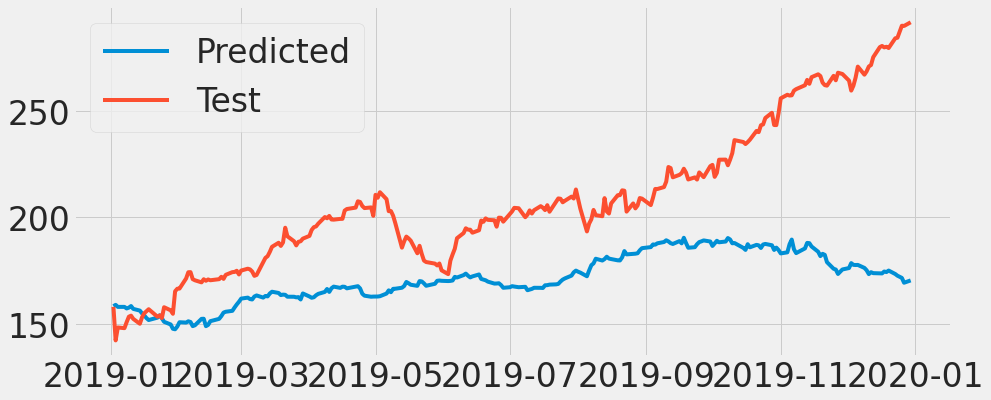

In [68]:
plt.figure(figsize=(14,6))
plt.plot(pred3, label='Predicted')
plt.plot(test, label ='Test')
plt.legend(loc = 'best')
plt.show()

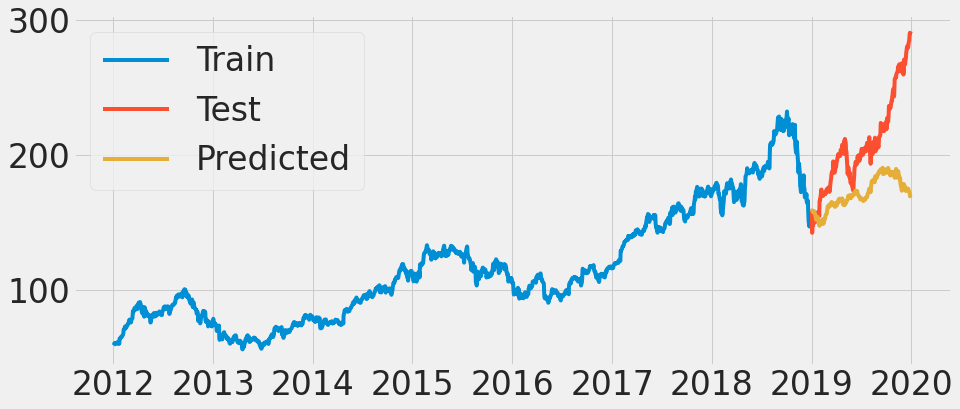

In [69]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label ='Test')
plt.plot(pred3,label = 'Predicted')
plt.legend(loc = 'best')
plt.show()

In [70]:
rmse3 = sqrt(mean_squared_error(pred3,test))
print('Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method =',rmse3)

Root Mean Squared Error of ARIMA with seasonal order using innovations_mle method = 45.615417386595745


# LSTM Model

In [ ]:
df

In [ ]:
print(df.shape)

#### converting data into numpy array:

In [ ]:
train_data=np.array(df)
train_data

#### from the dataset,seperate into training and testing data with 80/20 precentile


In [ ]:
dataset_train=np.array(train_data[:int(train_data.shape[0]*0.8)])
dataset_test=np.array(train_data[int(train_data.shape[0]*0.8):])
# Find the number of column for each dataset
print(dataset_train.shape)
print(dataset_test.shape)

#### Then separate the dataset of 1995 samples of data into training and testing with an 80/20 percentage, making the training dataset 1596 samples and the testing dataset 399 sample

### Scale the data:

In [ ]:
#scale the data to range[0,1]
#MiniMaxScaler subtract the minimum value in each feature and divides by the range(differncing between orignal min max)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(dataset_train)
train_data.shape

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(dataset_test)
train_data.shape

#### we scaled the data to the default range of [0, 1] and used MinMaxScaler which subtracts the minimum value in each individual feature and divides it by the range, which is calculated as the difference between the original minimum and maximum values.

### SEPARATE INTO X_TRAIN AND Y_TRAIN

In [ ]:
# decalred x_train and y_train
x_train = train_data[0:1595]
y_train = train_data[0:399]

x_train = np.reshape(x_train,(1595,1,1))
x_train.shape

In [ ]:
x_train.shape

In [ ]:
y_train.shape

#### Separate the data into x_train and y_train and reshape our x_train into an acceptable 3D input for the LSTM model.

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
len(train_data)

In [ ]:
len(y_train)

In [ ]:
x_input=train_data[-100:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(LSTM(50,activation='relu', return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,activation='relu',return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()1

### Fit the Model

In [ ]:
model.fit(X_train,y_train,validation_data=(X_train,y),epochs=30,batch_size = 64)

#### Train the model for 100 epochs with a batch size of 64. This means that 64 training samples will be used for 100 iterations.

### Predict the Testing Data

In [ ]:
# Dispaly the testing
print(dataset_test)
print(dataset_tets.shape)

In [ ]:
#Reshape the training data scale
inputs = np.reshape(scaler.transform(dataset_test),(399,1,1))
#Reverse the scaled prediction to their original values
stock_prediction = scaler.inverse_transform(model.predict(inputs)) 
stock_prediction

#### Plot the data

In [ ]:
plt.plot(stock_prediction, label='predicted Apple Stock Price',linewidth= 1.5)             
plt.plot(dataset_test,label='Actual price',linewidth=1.5)
plt.title("Actual Vs Prediction with LSTM'S ")
plt.xlabel('Time (Measured in Days)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse5=sqrt(mean_squared_error(dataset_test,stock_prediction))
print("Root Mean Squared Error of LSTM'S Model=",rmse5)

In [ ]:
#Extrapolate th min and max actual stock price
maxValTest = round(float(max(dataset_test)), 2)
minValTest = round(float(min(dataset_test)), 2)
print(" The Actual Maximum Stock Price is:" +str(maxValTest)+ "dollars")
print(" The Actual Maximum Stock Price is:" +str(minValTest)+ "dollars")

In [ ]:
maxValPredict = round(float(max(stock_prediction)), 2)
minValPredict = round(float(min(stock_prediction)), 2)
print(" The Predicted Maximum Stock Price is:" + str (maxValTest)+ "dollars")
print(" The predicted Maximum Stock Price is:" + str (minValTest)+ "dollars")

#### We calculated the minimum and maximum stock price for the actual dataset and predicted values.

In [ ]:
# Calculate error and model accurancy with Mape
total = 0 
for i ,j in zip(dataset_test,stock_prediction):
    value= abs(i - j )/abs(i)
    total += value
error = float(total*100/(len(dataset_test))) # calculate Mpae
mape = round(error,1) # raund to significant figure
accuracy = 100- mape # Calculte Accuracy
print("The  LSTM'S accuracy in predicting the stock price is: " + str(accuracy)+"%")